<h1>PYTHON SPRINT2 PROJECT - ECOMMERCE DATA ANALYSIS</h1>

<h2>Objective:</h2>


**The primary objective of this data analysis project is to gain valuable insights into the business by examining customer behavior, product performance, and order patterns. By analyzing customer preferences, we aim to understand who our customers are and what they prefer. Evaluating product sales and categories will help identify top-performing and slow-moving items. Exploring order details and peak order dates enables us to understand trends and optimize operations. Additionally, city-wise analysis will provide insights into regional variations. The ultimate goal is to provide actionable recommendations for business improvement and growth based on data-driven insights.**

In [2]:
# Import necessary libraries
import pandas as pd  # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib for plotting
import seaborn as sns  # Seaborn for statistical data visualization
import mysql.connector  # MySQL Connector for connecting to a MySQL database

In [3]:
#connect to mysql
connection = mysql.connector.connect(
    host='localhost',
    user='root', 
    password='root',
    database='ecommerce' #the database name from where you to want to fetch the data
)

In [4]:
#create a connection cursor object
cursor = connection.cursor()

In [5]:
# Query data from the 'customer' table
cursor.execute('SELECT * FROM customer')
#After fetching data from the database we are storing it into Pandas DataFrame
customer_data = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])

# Query data from the 'product' table
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])

# Query data from the 'order_details' table
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])

#close the connection and cursor
cursor.close()
connection.close()


In [5]:
#head() used to show top 5 records
customer_data.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171
3,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429
4,C1005,Jack,Lake Buena Vista,Jack@gmail.com,8876345678,1520 E Buena Vista Drive,32830


<h4>Inference:</h4>
<h5>Here, we can see the top 5 records of customer table.</h5>

In [7]:
product_data.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,P102,Chair,furniture,Chairs,20000.0,15000.00,10
1,P103,Laptop,Electronics,computer,60000.0,55000.00,50
2,P104,Smartphone,Electronics,phone,45000.0,40000.00,20
3,P105,Blender,Appliance,Electronics,500.0,450.00,10
4,P106,Laptop HP,Electronics,Computers,67200.0,55000.99,50


<h4>Inference:</h4>
<h5>Here, we can see the top 5 records of product table.</h5>

In [8]:
order_data.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,delivered


<h4>Inference:</h4>
<h5>Here, we can see the top 5 records of order_details table</h5>

<h2>Data Cleaning process of Customer table</h2>

In [11]:
customer_data.shape

(62, 7)

<h4>Inference:</h4>
<h5>Customer table comprises 62 rows and 7 columns.</h5>

In [14]:
# Display basic information like the columns name and their corresponding data types along with finding if they contain null values or not. 
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  62 non-null     object
 1   name         62 non-null     object
 2   city         62 non-null     object
 3   email        62 non-null     object
 4   phone_no     62 non-null     object
 5   address      62 non-null     object
 6   pin_code     62 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.5+ KB


<h4>Inference:</h4>
<h5>Here, we can see in customer table there is no null value. So, the dataset is clean. Also, we can see the datatype of table attribute.</h5>

In [10]:
customer_data.describe()

,pin_code
count,62.000000
mean,38989.225806
std,29968.018681
min,99.000000
25%,9408.000000
50%,34567.000000
75%,56789.000000
max,98766.000000


<h4>Inference:</h4>
<h5>Here we can see count,mean,std,min,25%,50%,75%,max of pin code from customer table</h5>

<h2>Data Cleaning process of Product table:</h2>

In [12]:
product_data.shape

(61, 7)

<h4>Inference:</h4>
<h5>Product table comprises 61 rows and 7columns.</h5>

In [15]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      61 non-null     object 
 1   product_name    61 non-null     object 
 2   category        61 non-null     object 
 3   sub_category    61 non-null     object 
 4   original_price  61 non-null     float64
 5   selling_price   61 non-null     float64
 6   stock           61 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 3.5+ KB


<h4>Inference:</h4>
<h5>Here, we can see in product table there is no null value. So, the dataset is clean.Also, we can see the datatype of table attribute .</h5>

In [8]:
product_data.describe()

,original_price,selling_price,stock
count,61.000000,61.000000,61.000000
mean,21011.491639,17774.622623,23.852459
std,19078.897228,16643.506566,13.984320
min,500.000000,450.000000,10.000000
25%,6000.000000,5000.000000,15.000000
50%,15000.000000,12000.000000,20.000000
75%,30000.000000,25000.000000,28.000000
max,80000.000000,70000.000000,100.000000


<h4>Inference:</h4>
<h5>Here we can see minimum,maximum,std,count ,25%,50%,75% of original price,selling price and stock of product table.</h4>

<h2>Data Cleaning process of Order_details table :</h2>

In [13]:
order_data.shape

(76, 8)

<h4>Inference:</h4>
<h5>Order_details table comprises 76 rows and 8 columns.</h5>

In [16]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      76 non-null     int64         
 1   customer_id   76 non-null     object        
 2   product_id    76 non-null     object        
 3   quantity      76 non-null     float64       
 4   total_price   76 non-null     float64       
 5   payment_mode  76 non-null     object        
 6   order_date    76 non-null     datetime64[ns]
 7   order_status  76 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.9+ KB


<h4>Inference:</h4>
<h5>Here, we can see in order_details table there is no null value. So, the dataset is clean.Also, we can see the datatype of table attribute.</h5>

In [9]:
order_data.describe()

,order_id,quantity,total_price,order_date
count,76.000000,76.000000,76.000000,76
mean,51.144737,1.355263,20873.684211,2024-02-02 03:28:25.263158016
min,3.000000,1.000000,450.000000,2023-11-23 00:00:00
25%,22.750000,1.000000,6500.000000,2024-01-02 18:00:00
50%,57.500000,1.000000,16500.000000,2024-02-12 12:00:00
75%,76.250000,2.000000,30000.000000,2024-03-02 06:00:00
max,95.000000,3.000000,90000.000000,2024-03-21 00:00:00
std,28.673660,0.558664,18442.574791,NaN


<h4>Inference:</h4>
<h5>Here we can see count,mean,min,max,std,25%,50%,75% of order_id,quantity,total_price and order data.</h5>

<h2>Exploratory Data Analysis (EDA) and Visualization:</h2>

<h3> Customer Analysis:</h3>

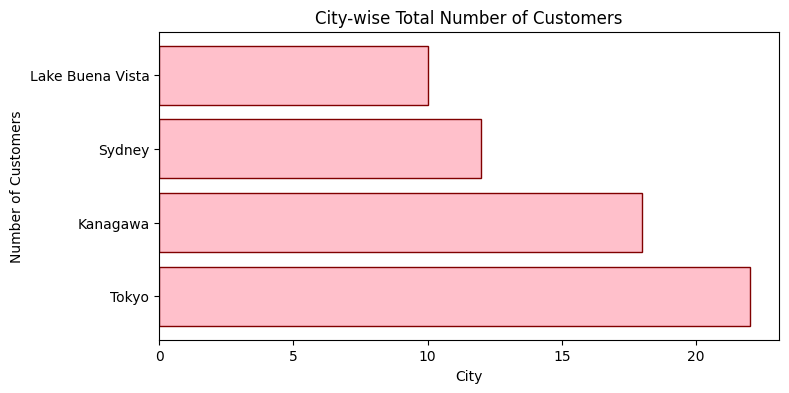

In [57]:
#bar graph to show total number of customers City wise.

# Grouping by city and getting the count of customers
customer_counts = customer_data['city'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 4))
plt.barh(customer_counts.index, customer_counts, color='pink',edgecolor='maroon')
plt.title('City-wise Total Number of Customers')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.show()

<h3>Inference:</h3>

**1.Tokyo stands out as the city with the highest number of customers, suggesting a significant customer or market demand in Tokyo.**

**2.Following Tokyo, Kanagawa has a considerable number of customers, though it is lower than Tokyo.**

**3.Sydney shows a moderate number of customers, indicating a steady customer presence in that city.**

**4.Lake Buena Vista has the lowest customer count among the listed cities, suggesting a smaller customer base or market presence in that area.**



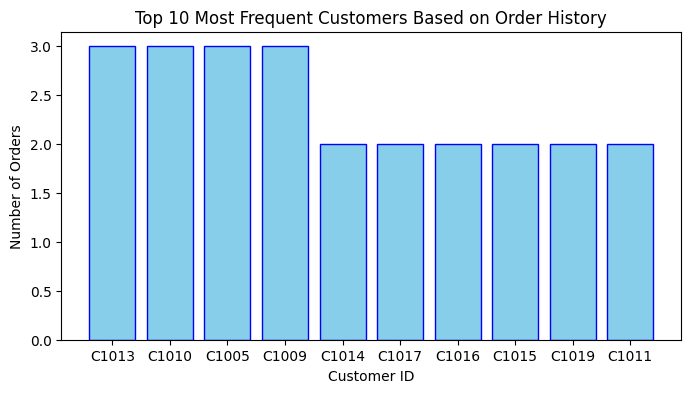

In [58]:
#Bar graph to show top 10  most frequent customers based on their order history.

# Grouping by customer_id and getting the count of orders for each customer
customer_order_counts = order_data['customer_id'].value_counts()

# Sorting customers by order count in descending order
most_frequent_customers = customer_order_counts.sort_values(ascending=False).head(10)  # Adjust the number as needed

# Create a bar graph
plt.figure(figsize=(8, 4))
plt.bar(most_frequent_customers.index, most_frequent_customers, color='skyblue',edgecolor='blue')
plt.title('Top 10 Most Frequent Customers Based on Order History')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.show()

<h3>Inference:</h3>

**1.Customers with IDs C1013, C1010, C1005, and C1009 have the highest order frequencies, making them the most frequent and active customers.**

**2.Customers with lower order counts, such as C1014,CC1017 and others, are less frequent and have fewer transactions compared to the top customers.**

    

<h3>Product Analysis:</h3>

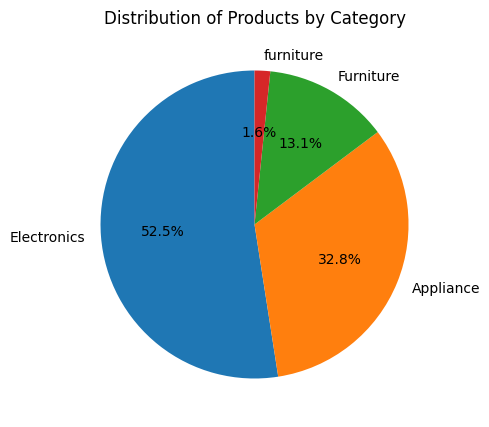

In [59]:
#Pie Chart for Product Distribution by Category
plt.figure(figsize=(5, 5))
category_counts = product_data['category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Products by Category')
plt.show()


<h3>Inference:</h3>

**1.Electronics emerges as the dominant category, constituting over half (52.5%) of the entire product range.**

**2. Notably, appliances contribute significantly, representing a substantial 32.8% of the overall product mix.**

**3. Furniture, on the other hand, maintains a minimal presence, contributing  1.6% to the product , indicating a limited emphasis on furniture items.**

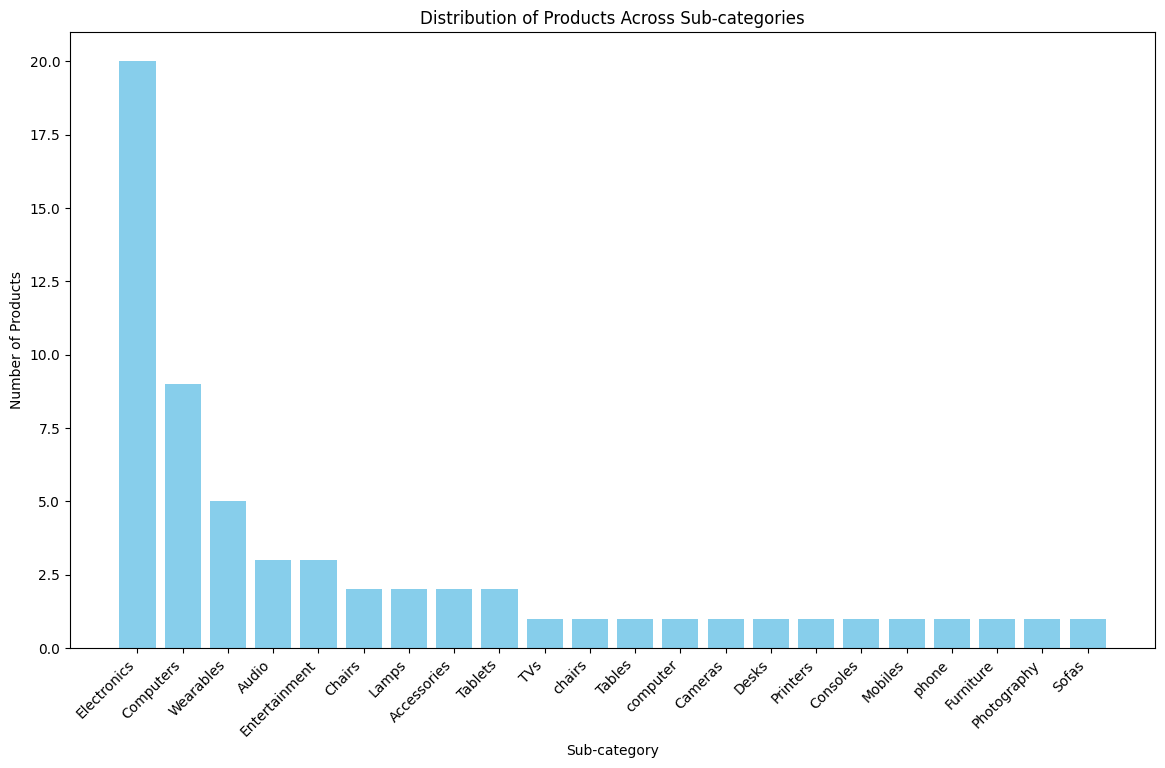

In [67]:
# the distribution of products across sub-categories.

# Grouping by sub-category and getting the count of products
sub_category_counts = product_data['sub_category'].value_counts()

# Create a bar plot
plt.figure(figsize=(14, 8))
plt.bar(sub_category_counts.index, sub_category_counts, color='skyblue')
plt.title('Distribution of Products Across Sub-categories')
plt.xlabel('Sub-category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.show()


<h3>Inference:</h3>

**Highest distribution of product across sub-category is Electrocnics and lowest are TVs to Sofas.**

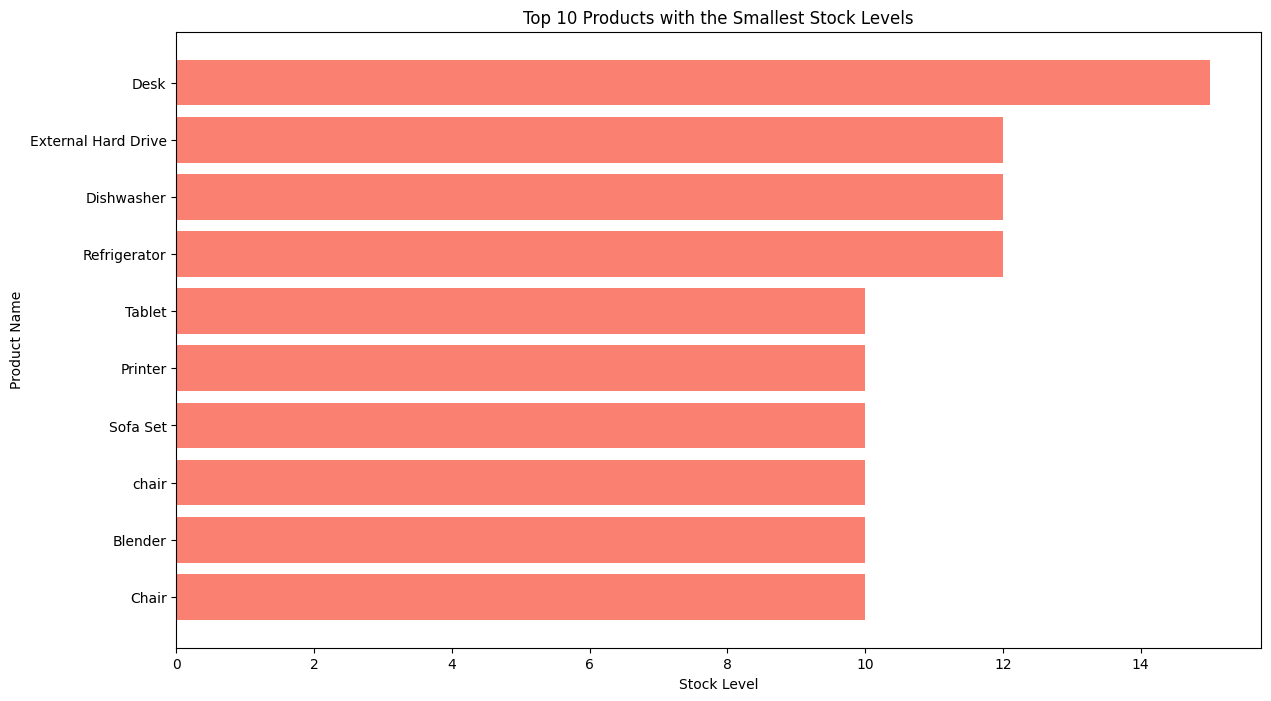

In [68]:
# Specify the number of products with the smallest stock levels you want to display
n_smallest = 10  # You can adjust this number as needed

# Get the n-smallest stock levels
smallest_stock_products = product_data.nsmallest(n_smallest, 'stock')

# Create a horizontal bar plot
plt.figure(figsize=(14, 8))
plt.barh(smallest_stock_products['product_name'], smallest_stock_products['stock'], color='salmon')
plt.title(f'Top {n_smallest} Products with the Smallest Stock Levels')
plt.xlabel('Stock Level')
plt.ylabel('Product Name')
plt.show()

<h3>Inference:<h3>

**The analysis of the top 10 products with the smallest stock levels reveals an interesting perspective on inventory management. Among these, items such as desks, external hard drives, dishwashers, refrigerators, tablets, printers and so on stand out with relatively low stock levels. This suggests that these specific products may be experiencing higher demand or have limited availability in the current inventory.**

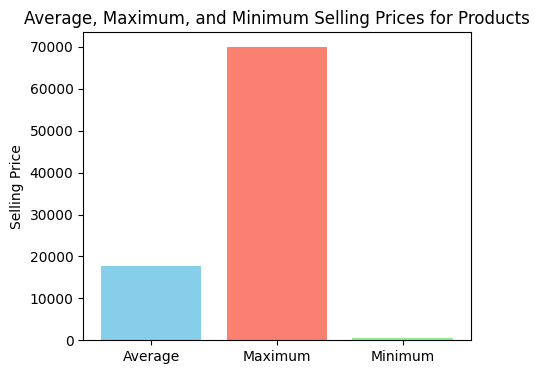

In [71]:
# Calculate average, maximum, and minimum selling prices
average_price = product_data['selling_price'].mean()
max_price = product_data['selling_price'].max()
min_price = product_data['selling_price'].min()

# Create a bar graph
plt.figure(figsize=(5, 4))
plt.bar(['Average', 'Maximum', 'Minimum'], [average_price, max_price, min_price], color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Average, Maximum, and Minimum Selling Prices for Products')
plt.ylabel('Selling Price')
plt.show()

<h3>Inference:</h3>

**1.The maximum selling price for products is high, suggesting that there are premium items in the inventory commanding a top-tier price point.**

**2.On average, the selling prices for products fall within a medium range. This indicates a balanced pricing strategy, where a majority of the products are positioned at a moderate price point.**

**3.Conversely, the minimum selling price for products is low, implying that there are entry-level or budget-friendly items available**

<h3>Order Analysis:</h3>

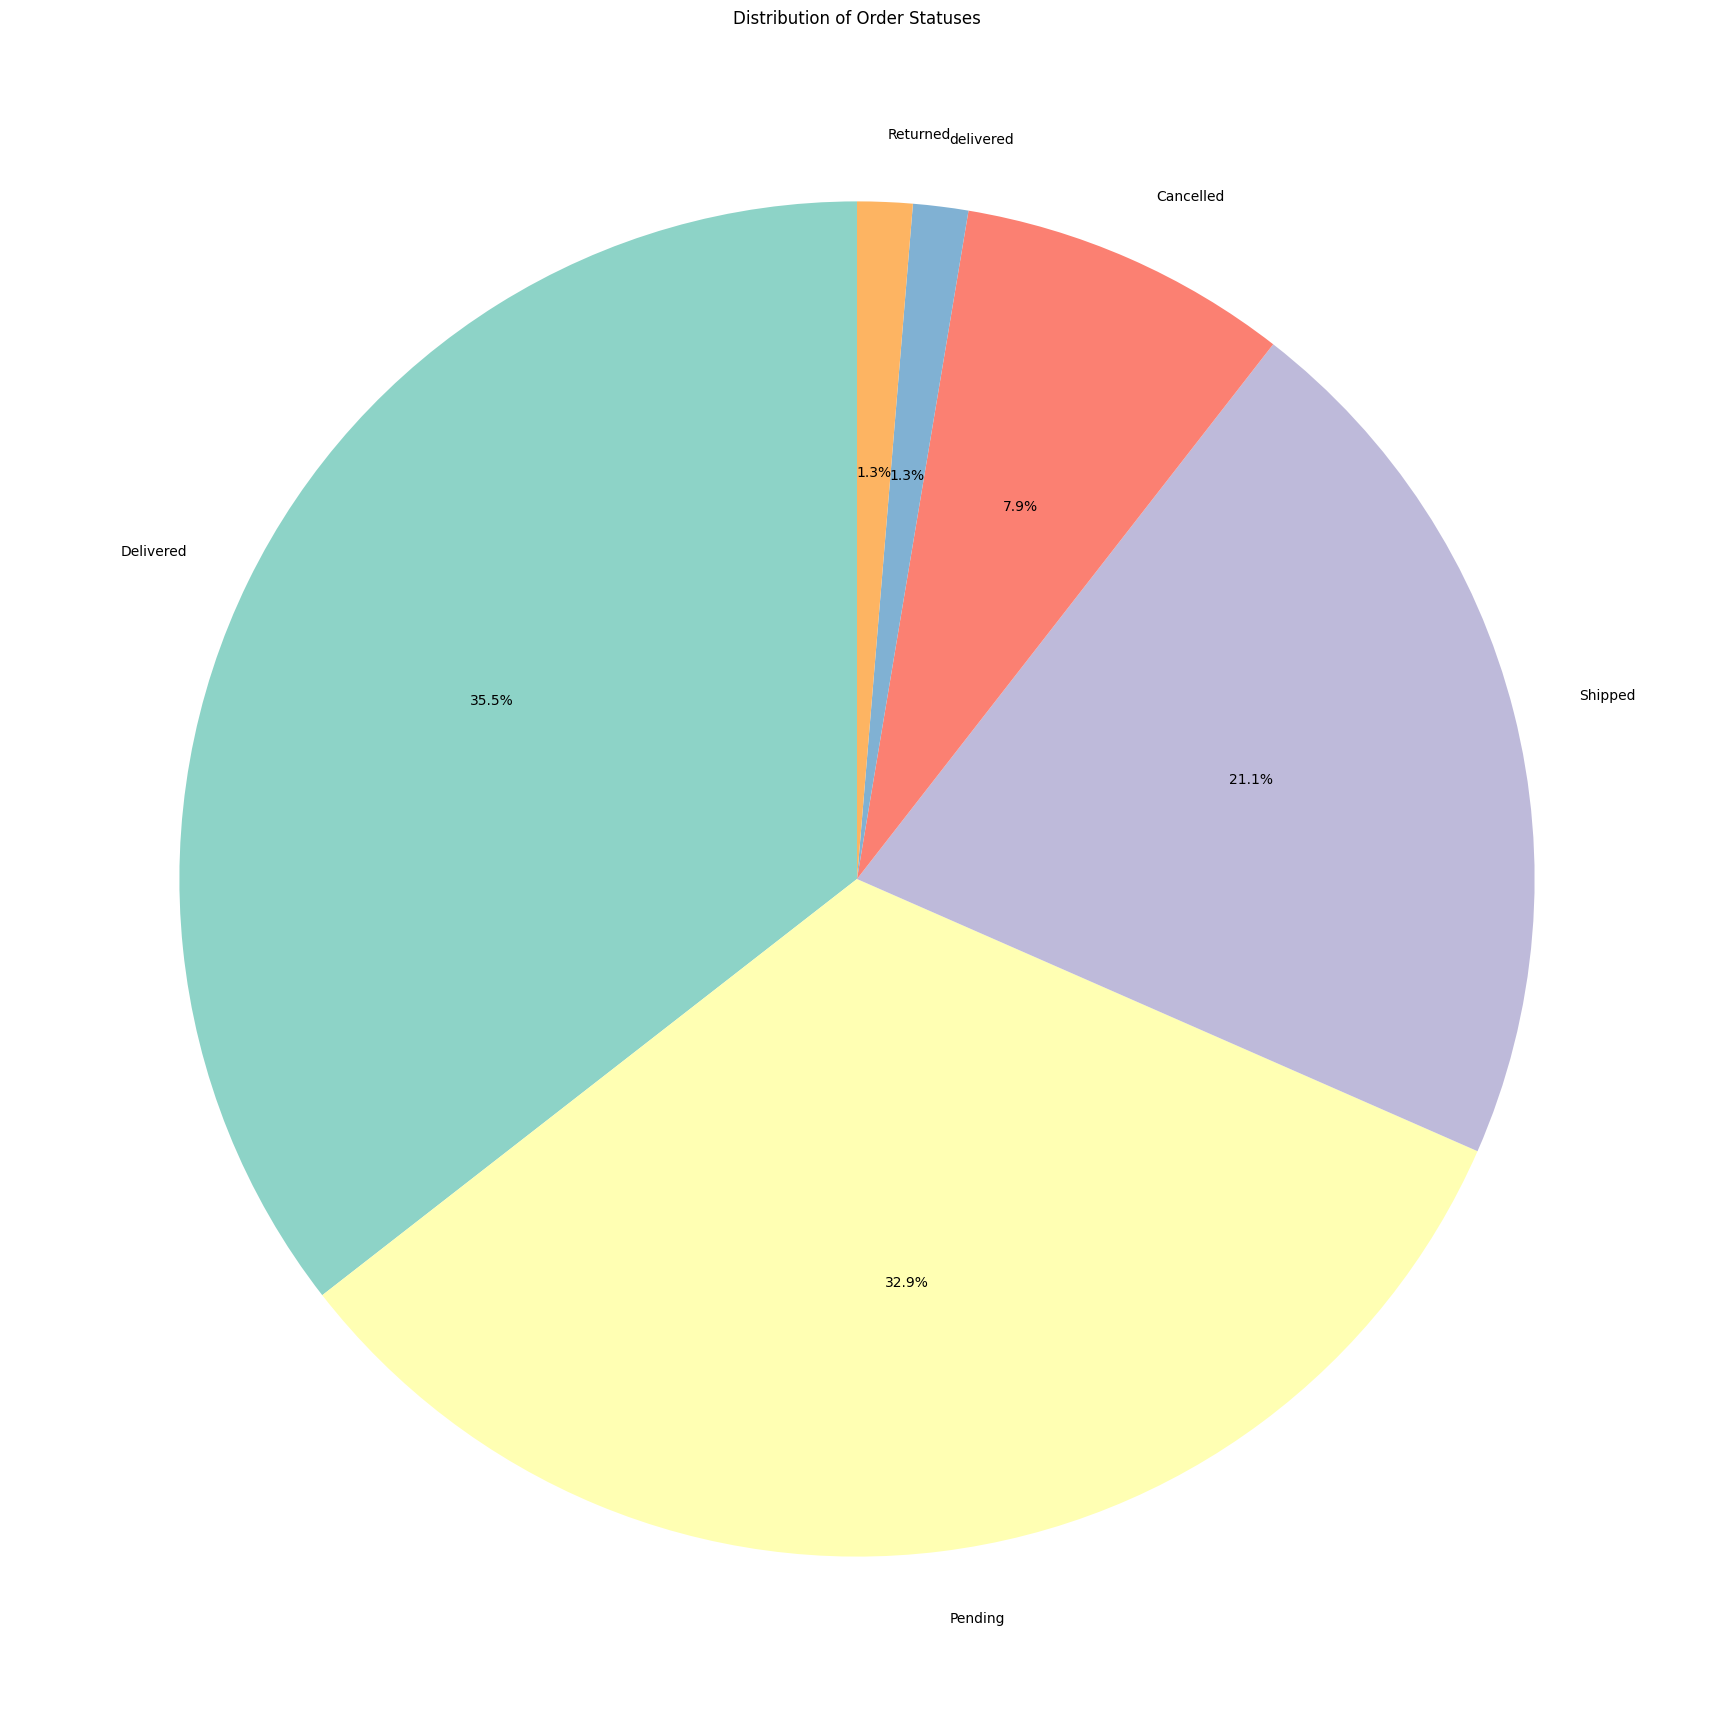

In [88]:
#pie chart for distribution of order status 
plt.figure(figsize=(22, 22))
order_status_counts = order_data['order_status'].value_counts()
colors = plt.cm.Set3(range(len(order_status_counts)))

# Creating a pie chart
plt.pie(order_status_counts, labels=order_status_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Order Statuses')
plt.show()

<h2>Inference:</h2>

**1.The majority of orders fall under the "Delivered"(35.5%) status, representing a significant portion of successful order completions.**

**2. A considerable portion of orders is categorized as "Pending,"(32.9%) indicating that these orders are in progress or awaiting further processing.**

**3.The "Shipped" (21.1%) status constitutes a substantial share, indicating a proactive approach to order processing.**

**4.The presence of cancelled orders at 7.9% suggests that a relatively small percentage of orders did not proceed to completion.**

**5. The "Returned" and "delivered" status represents a small fraction of orders.**

<Figure size 1400x800 with 0 Axes>

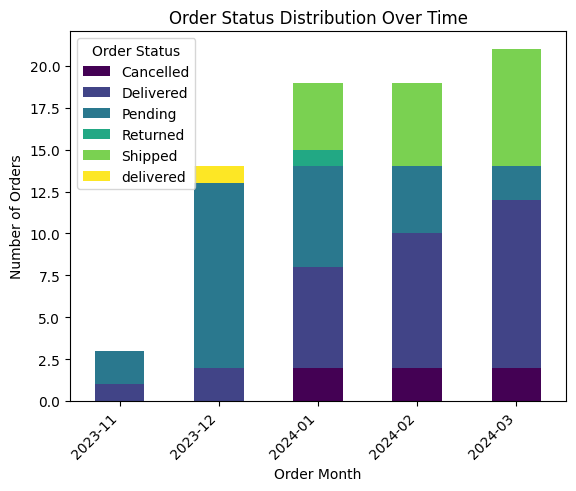

In [18]:
#Stacked Bar Chart for Order Status Over Time

# Convert 'order_date' to datetime format
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Extracting month and year from the order date
order_data['order_month'] = order_data['order_date'].dt.to_period('M')

# Create a pivot table to get the count of orders for each status in each month
status_counts = pd.pivot_table(order_data, index='order_month', columns='order_status', values='order_id', aggfunc='count', fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(14, 8))
status_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Order Status Distribution Over Time')
plt.xlabel('Order Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Order Status', loc='upper left')
plt.show()


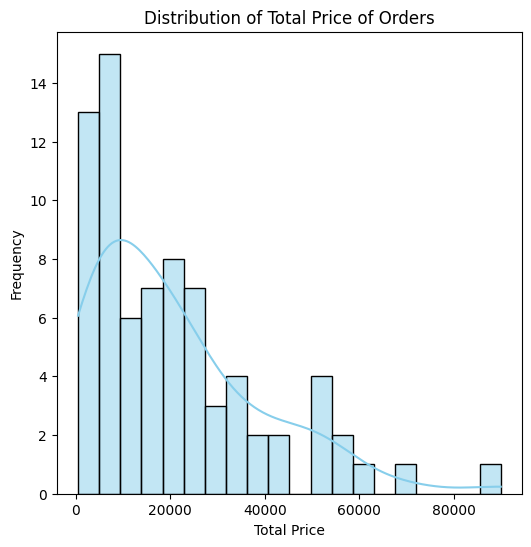

In [96]:
#Histogram for Total Price Distribution
plt.figure(figsize=(6, 6))
sns.histplot(order_data['total_price'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Price of Orders')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()


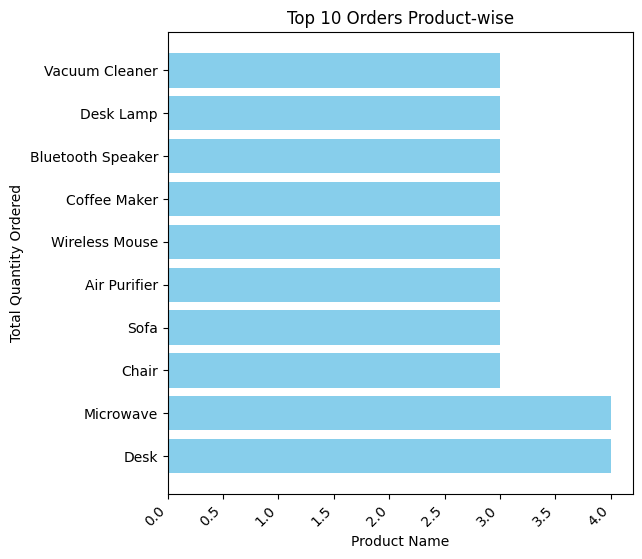

In [97]:
#bar graph for top 10 orders product-wise
# Grouping by product_id and getting the sum of quantities for each product
top_products = order_data.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)

# Fetching product details for the top products
top_products_details = pd.merge(top_products.reset_index(), product_data[['product_id', 'product_name']], on='product_id', how='left')

# Create a bar plot
plt.figure(figsize=(6, 6))
plt.barh(top_products_details['product_name'], top_products_details['quantity'], color='skyblue')
plt.title('Top 10 Orders Product-wise')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45, ha='right')
plt.show()

<h2>Inference:</h2>

**Top 10 orders product-wise desk,microwave,chair,desk lamp etc**

<h3>Sales Analysis:</h3>

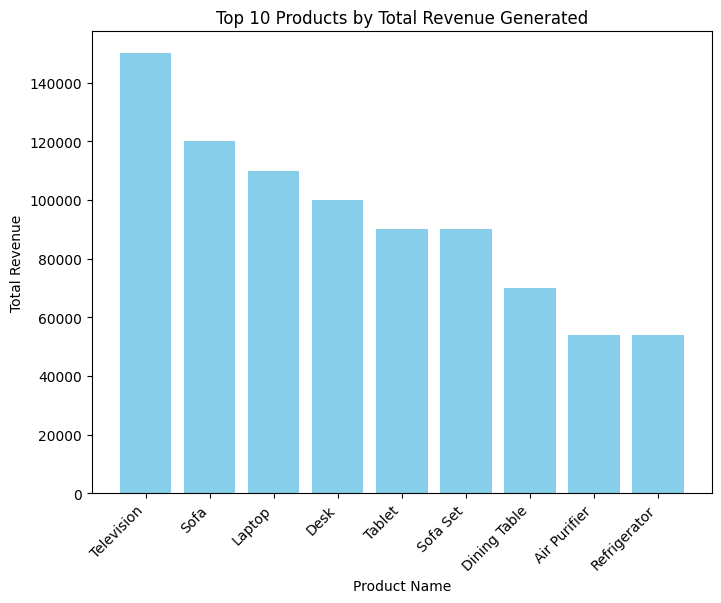

In [100]:
# bar graph for total revenue generated from orders product wise

# Merge 'order_data' and 'product_data' to get product details for each order
merged_data = pd.merge(order_data, product_data, on='product_id', how='left')

# Calculate the total revenue generated for each product
merged_data['total_revenue'] = merged_data['quantity'] * merged_data['selling_price']

# Grouping by product_id and getting the sum of total revenue for each product
total_revenue_product_wise = merged_data.groupby('product_id')['total_revenue'].sum().sort_values(ascending=False)

# Fetching product details for the top 10 products
top_products_details = pd.merge(total_revenue_product_wise.head(10).reset_index(), product_data[['product_id', 'product_name']], on='product_id', how='left')

# Create a bar plot for the top 10 products
plt.figure(figsize=(8, 6))
plt.bar(top_products_details['product_name'], top_products_details['total_revenue'], color='skyblue')
plt.title('Top 10 Products by Total Revenue Generated')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()


<h2>Inference:</h2>

**The top 10 products by total revenue generated including televisions, sofas, laptops, and desks, suggest that these items are significant contributors to overall sales and revenue. This could be attributed to their higher individual prices, indicating that customers are willing to make substantial purchases for these product categories.**

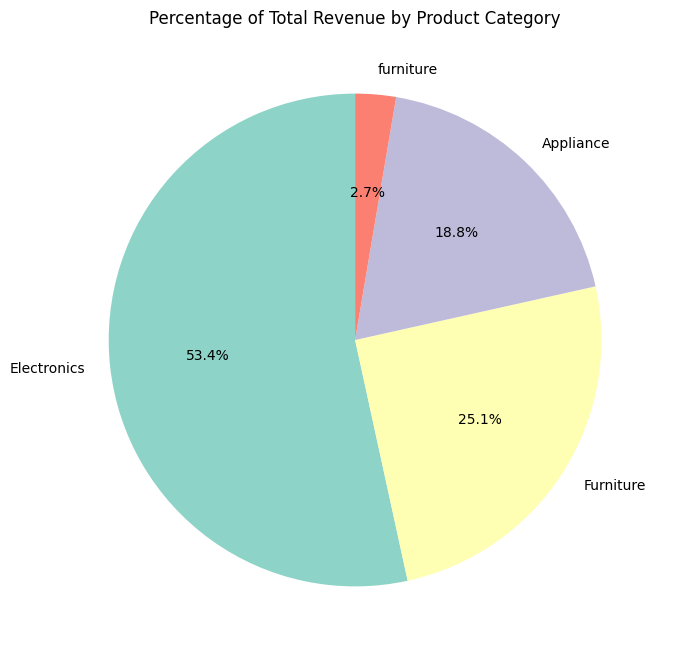

In [103]:
# total revenue product category wise percentage
# Merge 'order_data' and 'product_data' to get product details for each order
merged_data = pd.merge(order_data, product_data, on='product_id', how='left')

# Calculate the total revenue generated for each product
merged_data['total_revenue'] = merged_data['quantity'] * merged_data['selling_price']

# Grouping by product category and getting the sum of total revenue for each category
total_revenue_category_wise = merged_data.groupby('category')['total_revenue'].sum().sort_values(ascending=False)

# Calculate the total revenue across all categories
overall_total_revenue = total_revenue_category_wise.sum()

# Calculate the percentage of total revenue for each category
percentage_revenue_category_wise = (total_revenue_category_wise / overall_total_revenue) * 100

# Create a pie chart for the percentage of total revenue category-wise
plt.figure(figsize=(8, 8))
plt.pie(percentage_revenue_category_wise, labels=percentage_revenue_category_wise.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3(range(len(percentage_revenue_category_wise))))
plt.title('Percentage of Total Revenue by Product Category')
plt.show()


<h2>Inference:</h2>

**1.Electronics(53.4%) emerge as the dominant contributor, representing over half of the total revenue.**

**2. Appliances(18.8%) constitute a substantial share of the total revenue, highlighting their significant contribution to overall sales.** 

**3. Furniture(25.1%) accounts for a quarter of the total revenue, indicating a noteworthy but slightly lower contribution compared to electronics.**

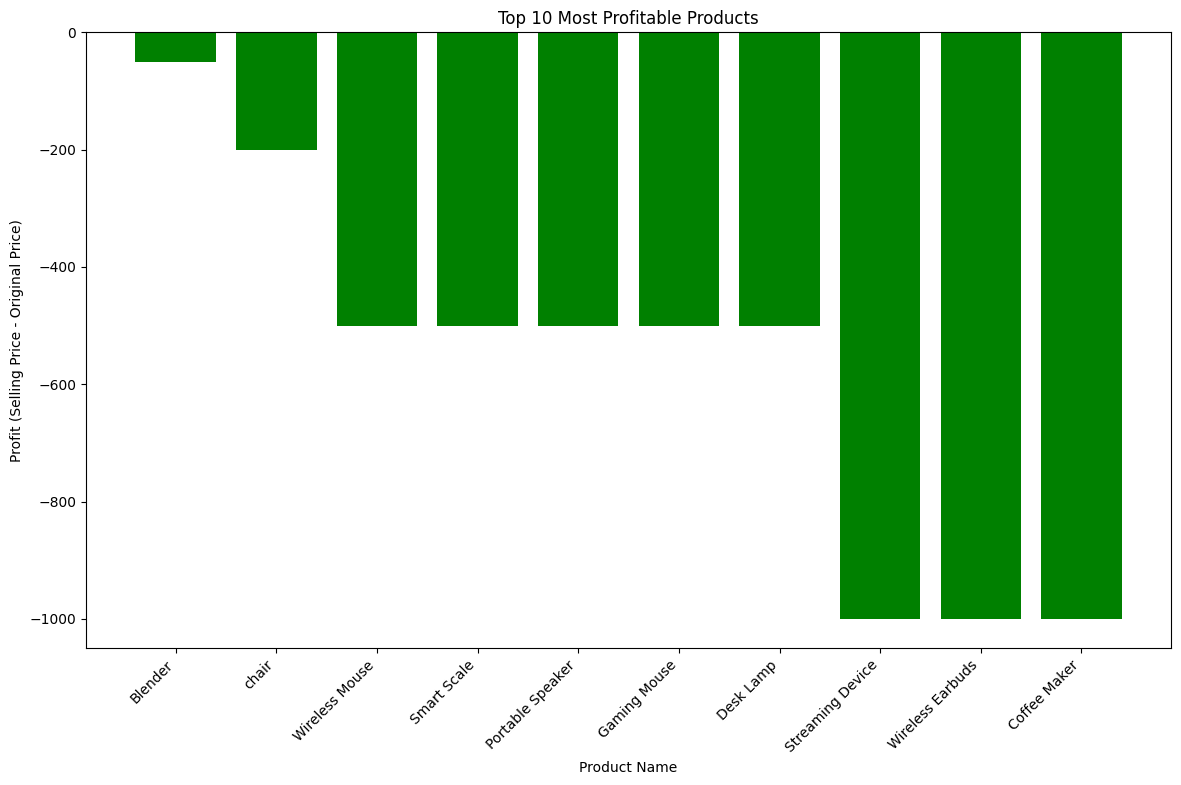

In [106]:
#graph for top 10 most profitable products
# Calculate the profit for each product
product_data['profit'] = product_data['selling_price'] - product_data['original_price']

# Sort products based on profit in descending order
most_profitable_products = product_data.sort_values(by='profit', ascending=False).head(10)  # Displaying the top 10

# Create a bar plot for the most profitable products
plt.figure(figsize=(14, 8))
plt.bar(most_profitable_products['product_name'], most_profitable_products['profit'], color='green')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product Name')
plt.ylabel('Profit (Selling Price - Original Price)')
plt.xticks(rotation=45, ha='right')
plt.show()


<h3>Customer Order Patterns:</h3>

In [107]:
#Identify product names with the highest and lowest order quantities.
# Grouping by product_id and getting the sum of quantities for each product
product_order_quantities = order_data.groupby('product_id')['quantity'].sum()

# Fetching product details for the highest and lowest order quantities
highest_quantity_product = product_order_quantities.idxmax()
lowest_quantity_product = product_order_quantities.idxmin()

# Get the product names corresponding to the highest and lowest order quantities
highest_quantity_product_name = product_data.loc[product_data['product_id'] == highest_quantity_product, 'product_name'].values[0]
lowest_quantity_product_name = product_data.loc[product_data['product_id'] == lowest_quantity_product, 'product_name'].values[0]

# Display the results
print(f"Product with the Highest Order Quantity: {highest_quantity_product_name} (Product ID: {highest_quantity_product})")
print(f"Product with the Lowest Order Quantity: {lowest_quantity_product_name} (Product ID: {lowest_quantity_product})")


Product with the Highest Order Quantity: Desk (Product ID: P108)
Product with the Lowest Order Quantity: Printer (Product ID: P120)


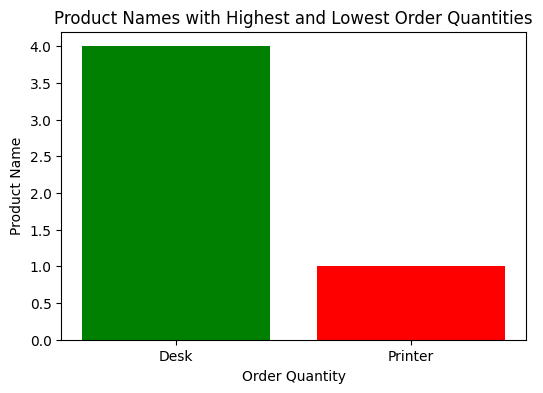

In [111]:
# Create a bar plot for product name with highest and lowest order quantities
plt.figure(figsize=(6, 4))
plt.bar([highest_quantity_product_name, lowest_quantity_product_name], [product_order_quantities[highest_quantity_product], product_order_quantities[lowest_quantity_product]], color=['green', 'red'])
plt.title('Product Names with Highest and Lowest Order Quantities')
plt.xlabel('Order Quantity')
plt.ylabel('Product Name')
plt.show()

<h2>Inference:</h2>

**Desks, with the highest order quantity, reflect a consistent demand, likely driven by the rise in remote work. Conversely, printers, with the lowest order quantity, indicate a lower demand, possibly influenced by digitalization and a shift in consumer habits.**

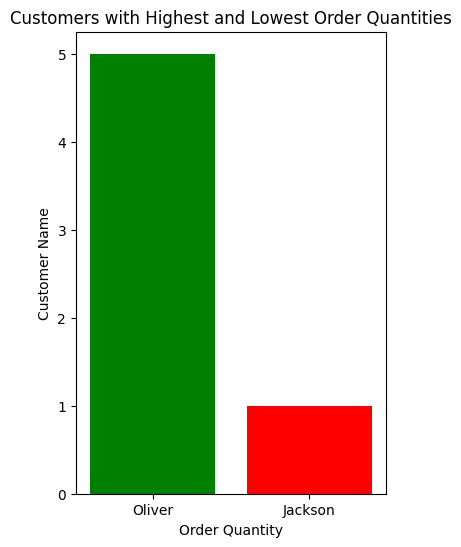

In [114]:
# bar plot for customers with the highest and lowest order quantities by customer name
# Grouping by customer_id and getting the sum of quantities for each customer
customer_order_quantities = order_data.groupby('customer_id')['quantity'].sum()

# Fetching customer details for the highest and lowest order quantities
highest_quantity_customer = customer_order_quantities.idxmax()
lowest_quantity_customer = customer_order_quantities.idxmin()

# Get the customer names corresponding to the highest and lowest order quantities
highest_quantity_customer_name = customer_data.loc[customer_data['customer_id'] == highest_quantity_customer, 'name'].values[0]
lowest_quantity_customer_name = customer_data.loc[customer_data['customer_id'] == lowest_quantity_customer, 'name'].values[0]

# Create a horizontal bar plot
plt.figure(figsize=(4, 6))
plt.bar([highest_quantity_customer_name, lowest_quantity_customer_name], [customer_order_quantities[highest_quantity_customer], customer_order_quantities[lowest_quantity_customer]], color=['green', 'red'])
plt.title('Customers with Highest and Lowest Order Quantities')
plt.xlabel('Order Quantity')
plt.ylabel('Customer Name')
plt.show()


<h2>Inference:</h2>

**Oliver's significant order suggests a regular and valuable customer, while Jackson's lowest order indicates a more conservative and occasional buyer.** 

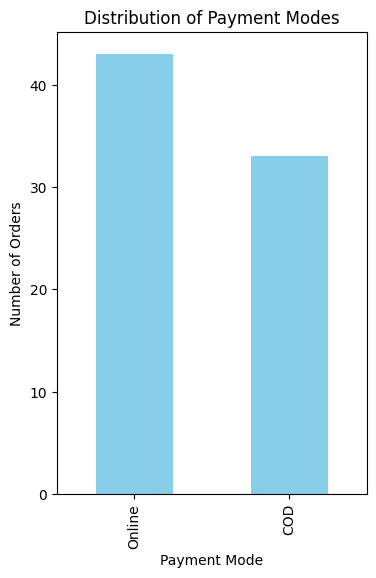

In [117]:
#graph for the most preferred payment mode

# Count the occurrences of each payment mode
payment_mode_counts = order_data['payment_mode'].value_counts()

# Create a bar plot for the most preferred payment mode
plt.figure(figsize=(4, 6))
payment_mode_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Payment Modes')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.show()

<h2>Inference:</h2>

**The high distribution in online payment methods and low use of Cash on Delivery (COD) suggests a strong preference for digital transactions. Customers are inclined towards the convenience and efficiency of online payment modes, reflecting a shift towards digital commerce and a decreased reliance on traditional COD transactions.**

<h3> Time-based Analysis:</h3>

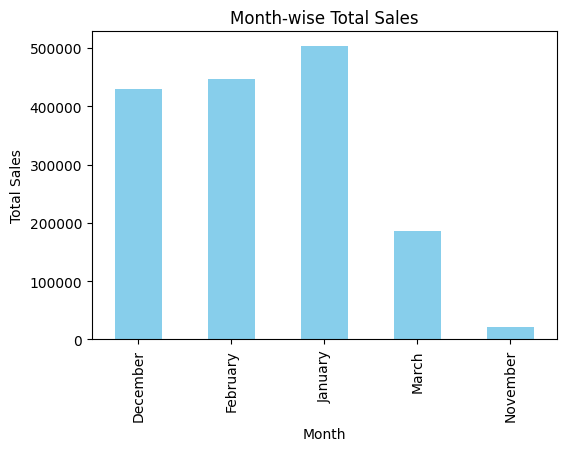

In [125]:
#graph for month-wise total sales

# Convert 'order_date' to datetime format
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Extract the month from the 'order_date'
order_data['order_month'] = order_data['order_date'].dt.month_name()

# Group by month and calculate total sales
monthly_sales = order_data.groupby('order_month')['total_price'].sum()

# Create a bar plot for month-wise total sales with month names
plt.figure(figsize=(6,4))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Month-wise Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

<h2>Inference:</h2>

**Sales show a distinctive pattern with the highest in January, moderate figures in February and December, and the lowest in November. This trend may be influenced by factors like holiday season demand in December, New Year resolutions in January, and a potential slowdown post-holidays in November. Retailers can strategically plan promotions and inventory management around these seasonal variations to optimize sales throughout the year.**

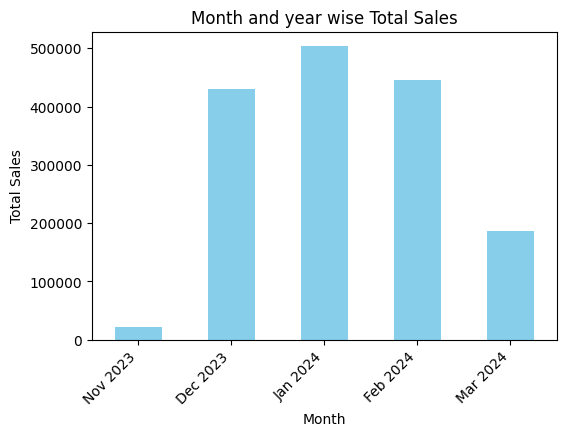

In [6]:
#graph for month and year-wise total sales

# Convert 'order_date' to datetime format
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Extract the month and year from the 'order_date'
order_data['order_month'] = order_data['order_date'].dt.to_period('M')

# Group by month and calculate total sales
monthly_sales = order_data.groupby('order_month')['total_price'].sum()

# Create a bar plot for month-wise total sales with month names
plt.figure(figsize=(6, 4))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Month and year wise Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Format x-axis labels with month names
plt.xticks(range(len(monthly_sales.index)), [month.strftime('%b %Y') for month in monthly_sales.index], rotation=45, ha='right')
plt.show()

<h2>Inference:</h2>

**Sales show a distinctive pattern with the highest in January 2024, moderate figures in February and December 2023, and the lowest in November. This trend may be influenced by factors like holiday season demand in December, New Year resolutions in January, and a potential slowdown post-holidays in November. Retailers can strategically plan promotions and inventory management around these seasonal variations to optimize sales throughout the year.**

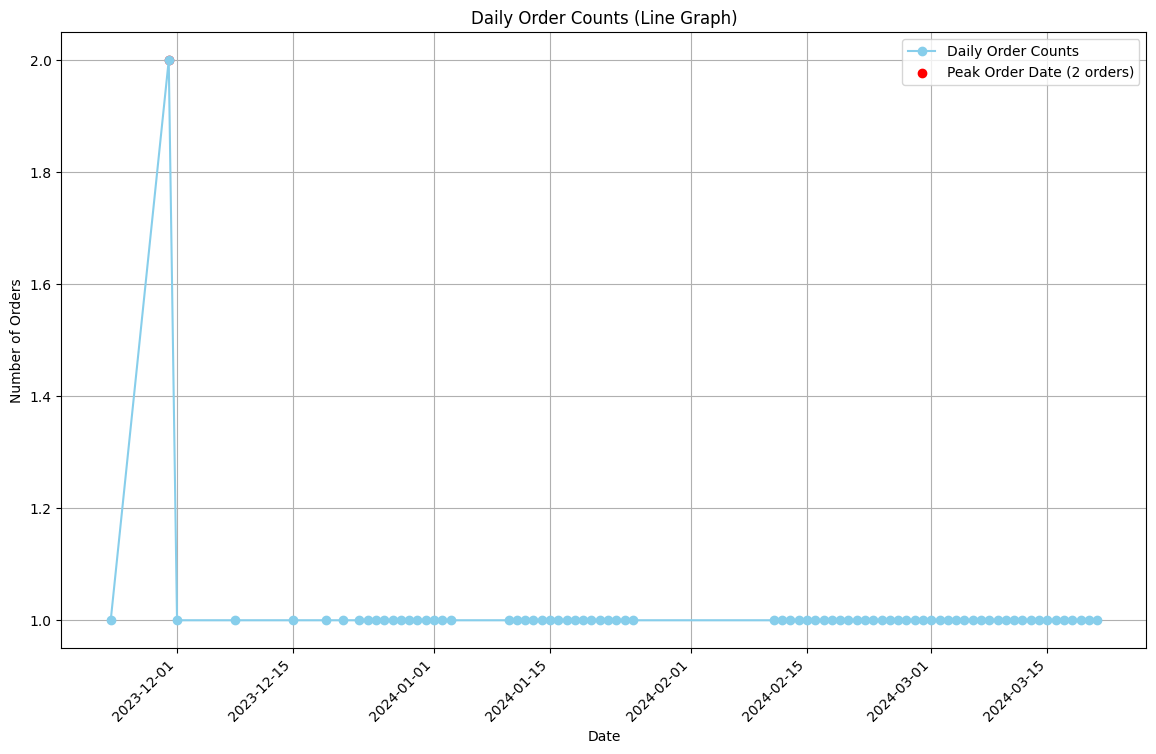

In [128]:


# Convert 'order_date' to datetime format
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Group by order date and calculate the total number of orders for each date
daily_order_counts = order_data['order_date'].dt.date.value_counts().sort_index()

# Identify the peak order date
peak_order_date = daily_order_counts.idxmax()
peak_order_count = daily_order_counts.max()

# Create a line plot for daily order counts
plt.figure(figsize=(14, 8))
plt.plot(daily_order_counts.index, daily_order_counts, marker='o', color='skyblue', label='Daily Order Counts')

# Highlight the peak order date
plt.scatter(peak_order_date, peak_order_count, color='red', label=f'Peak Order Date ({peak_order_count} orders)')

plt.title('Daily Order Counts (Line Graph)')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.show()


<h3> Product Performance:</h3>

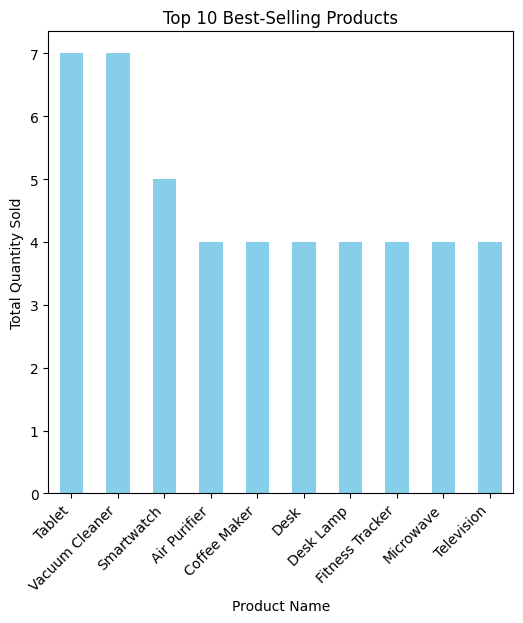

In [134]:
#bar graph for top 10 best-selling products

# Merge 'order_data' and 'product_data' to get product details for each order
merged_data = pd.merge(order_data, product_data, on='product_id', how='left')

# Calculate the total quantity sold for each product
product_sales = merged_data.groupby('product_name')['quantity'].sum()

# Get the top 10 best-selling products
top_10_products = product_sales.nlargest(10)

# Create a bar plot for the top 10 best-selling products
plt.figure(figsize=(6, 6))
top_10_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()


<h2>Inference:</h2>

**The top 10 best-selling products including tablets, vacuum cleaners, smartwatches, and air purifiers etc indicate high consumer demand for these items**

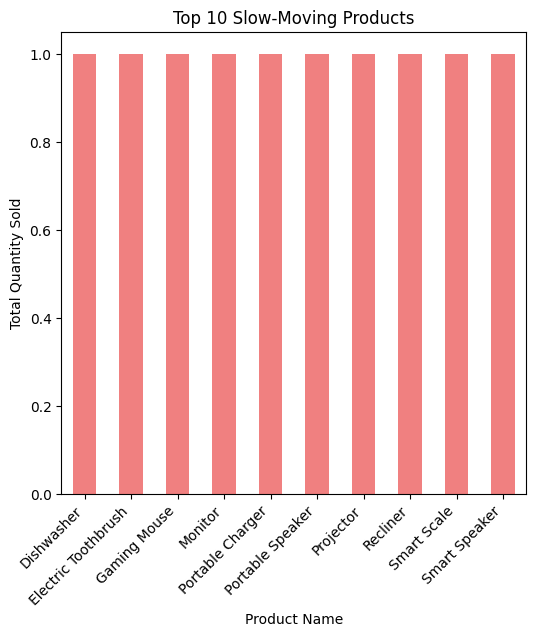

In [136]:
#bar graph for top 10 slow-selling products
# Merge 'order_data' and 'product_data' to get product details for each order
merged_data = pd.merge(order_data, product_data, on='product_id', how='left')

# Calculate the total quantity sold for each product
product_sales = merged_data.groupby('product_name')['quantity'].sum()

# Get the top 10 slow-moving products (lowest sales)
top_10_slow_moving_products = product_sales.nsmallest(10)

# Create a bar plot for the top 10 slow-moving products
plt.figure(figsize=(6, 6))
top_10_slow_moving_products.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Slow-Moving Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()


<h2>Inference:</h2>

**The identification of slow-moving products, including dishwashers, electric toothbrushes, gaming mice, monitors, etc., suggests that these items experience lower purchase frequency, potentially due to their durability or longer replacement cycles. Retailers should focus on efficient inventory management, consider targeted marketing strategies, and understand consumer behavior to optimize the sales of these products.**

<h2> Conclusion:</h2>

**This project aimed to understand customers, products, and orders through simple data analysis. We looked at who our customers are, which products perform well, and when orders peak. By doing so, we gained insights to enhance our business strategies. The findings provide easy-to-understand information for making improvements in marketing, inventory, and overall business decisions, ensuring a customer-focused and growth-oriented approach.**

<h2>Future Work:</h2>

**Future work can focus on integrating additional data sources, implementing predictive analytics with machine learning models, exploring customer segmentation for personalized strategies, and incorporating real-time data feeds. Regular updates and continuous monitoring will be essential for adapting the analysis to evolving business landscapes and opportunities, ensuring ongoing growth.**